# EMT Simulation of topology with slack, line and VSI

In [1]:
from villas.dataprocessing.readtools import *
from villas.dataprocessing.timeseries import *
import numpy as np
import matplotlib.pyplot as plt
import re
#import dpsimpy

%matplotlib widget

In [2]:
import os
import subprocess

#%matplotlib widget

name = 'EMT_Slack_PiLine_VSI_VoltageControlled_SteadyState_with_PF_Init'

dpsim_path = subprocess.Popen(['git', 'rev-parse', '--show-toplevel'], stdout=subprocess.PIPE).communicate()[0].rstrip().decode('utf-8')

path_exec = dpsim_path + '/build/dpsim/examples/cxx/'
sim = subprocess.Popen([path_exec + name], stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
print(sim.communicate()[0].decode())

[15:58:08.090767 EMT_Slack_PiLine_VSI_VoltageControlled_SteadyState_with_PF_Init_PF info] Initialize simulation: EMT_Slack_PiLine_VSI_VoltageControlled_SteadyState_with_PF_Init_PF
[15:58:08.090829 EMT_Slack_PiLine_VSI_VoltageControlled_SteadyState_with_PF_Init_PF_PF_Solver warning] No suitable quantity found for setting mBaseApparentPower. Using 100000000 VA.
[15:58:08.090925 EMT_Slack_PiLine_VSI_VoltageControlled_SteadyState_with_PF_Init_PF info] Scheduling tasks.
[15:58:08.090991 EMT_Slack_PiLine_VSI_VoltageControlled_SteadyState_with_PF_Init_PF info] Scheduling done.
[15:58:08.090996 EMT_Slack_PiLine_VSI_VoltageControlled_SteadyState_with_PF_Init_PF info] Opening interfaces.
[15:58:08.090997 EMT_Slack_PiLine_VSI_VoltageControlled_SteadyState_with_PF_Init_PF info] Start synchronization with remotes on interfaces
[15:58:08.090998 EMT_Slack_PiLine_VSI_VoltageControlled_SteadyState_with_PF_Init_PF info] Synchronized simulation start with remotes
[15:58:08.091000 EMT_Slack_PiLine_VSI_Vol

In [3]:
modelName = 'EMT_Slack_PiLine_VSI_VoltageControlled_SteadyState_with_PF_Init_EMT'
path = 'logs/' + modelName + '/'
dpsim_result_file = path + modelName + '.csv'
PEAK1PH_TO_RMS3PH = np.sqrt(3.0/2.0)
ts_dpsim = read_timeseries_csv(dpsim_result_file)
# ts_dpsim_simulink = read_timeseries_csv('logs/pcc_stationary_simulink.csv')

column number: 15
results length: 20002
real column names: ['Controlled_source_PV_0', 'Controlled_source_PV_1', 'Controlled_source_PV_2', 'P_elec', 'Q_elec', 'Strom_PV_0', 'Strom_PV_1', 'Strom_PV_2', 'VCO_output', 'Voltage_PCC_0', 'Voltage_PCC_1', 'Voltage_PCC_2', 'Voltage_terminal_PV_0', 'Voltage_terminal_PV_1', 'Voltage_terminal_PV_2']
complex column names: []


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


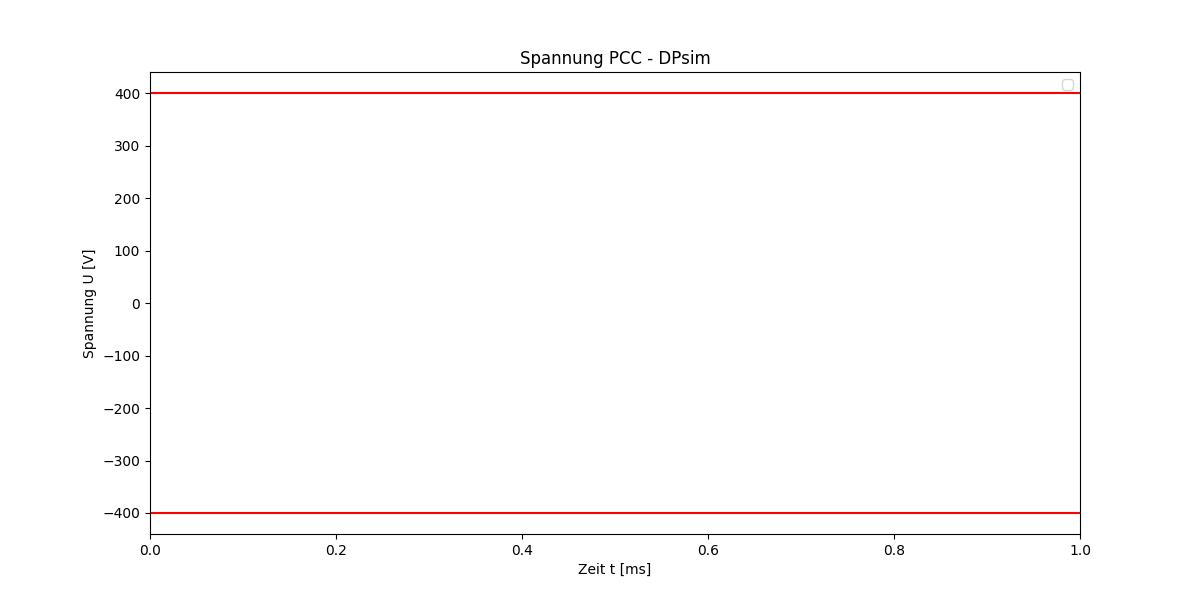

In [6]:
plt.figure(figsize=(12,6))
plt.title('Spannung PCC - DPsim')
plt.xlabel('Zeit t [ms]')
plt.ylabel('Spannung U [V]')
for ts_name, ts_obj  in ts_dpsim.items():
    if ts_name in ['Spannung_PCC_0', 'Spannung_PCC_1', 'Spannung_PCC_2']:
        plt.plot(ts_obj.time, PEAK1PH_TO_RMS3PH*ts_obj.values, label=ts_name)
plt.axhline(y =400, color = 'r', linestyle = '-')
plt.axhline(y =-400, color = 'r', linestyle = '-')
#plt.ylim(-2000,2250)
plt.legend()
plt.show()

NameError: name 'ts_dpsim_simulink' is not defined

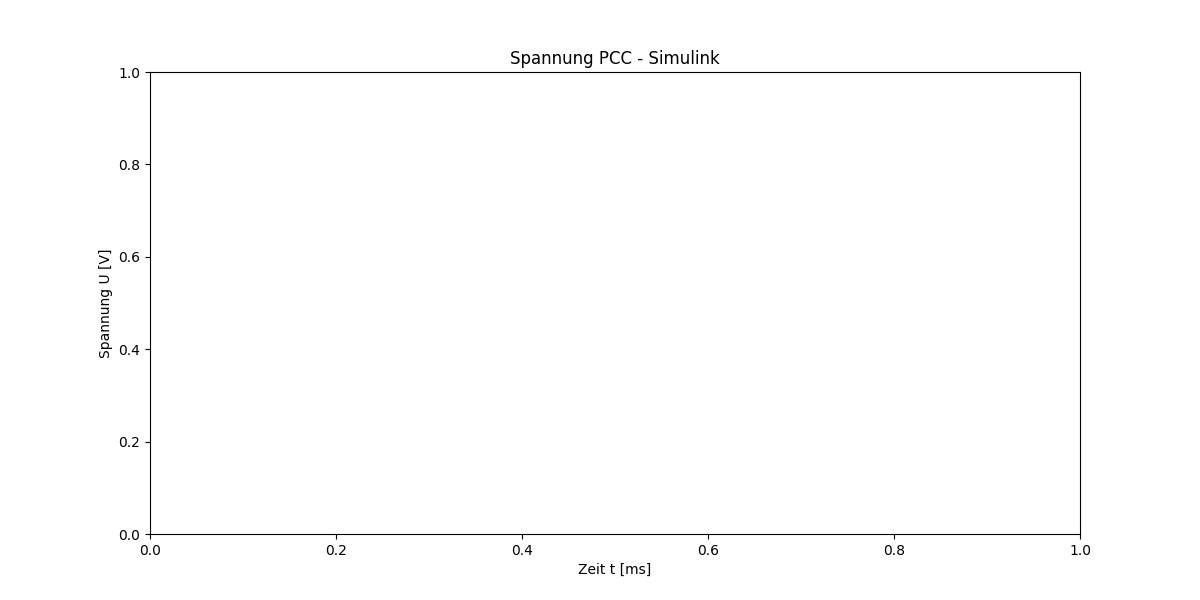

In [5]:
plt.figure(figsize=(12,6))
plt.title('Spannung PCC - Simulink')
plt.xlabel('Zeit t [ms]')
plt.ylabel('Spannung U [V]')
for ts_name, ts_obj  in ts_dpsim_simulink.items():
    if ts_name in ['Spannung_PCC_0', 'Spannung_PCC_1', 'Spannung_PCC_2']:
        plt.plot(1000*ts_obj.time, ts_obj.values, label=ts_name)
plt.axhline(y =400, color = 'r', linestyle = '-')
plt.axhline(y =-400, color = 'r', linestyle = '-')
plt.ylim(-2000,2250)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


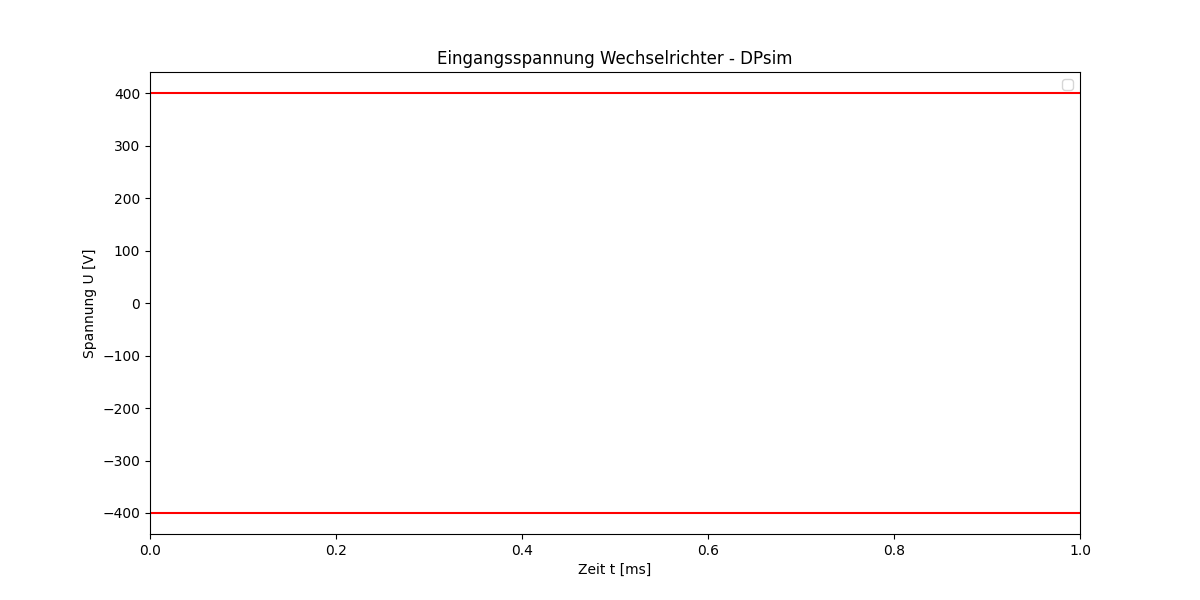

In [7]:
plt.figure(figsize=(12,6))
plt.title('Eingangsspannung Wechselrichter - DPsim')
plt.xlabel('Zeit t [ms]')
plt.ylabel('Spannung U [V]')
for ts_name, ts_obj  in ts_dpsim.items():
    if ts_name in ['Spannung_Quelle_0','Spannung_Quelle_1','Spannung_Quelle_2']:
        plt.plot(1000*ts_obj.time, ts_obj.values, label=ts_name)
plt.axhline(y =400, color = 'r', linestyle = '-')
plt.axhline(y =-400, color = 'r', linestyle = '-')
plt.legend()
plt.show()

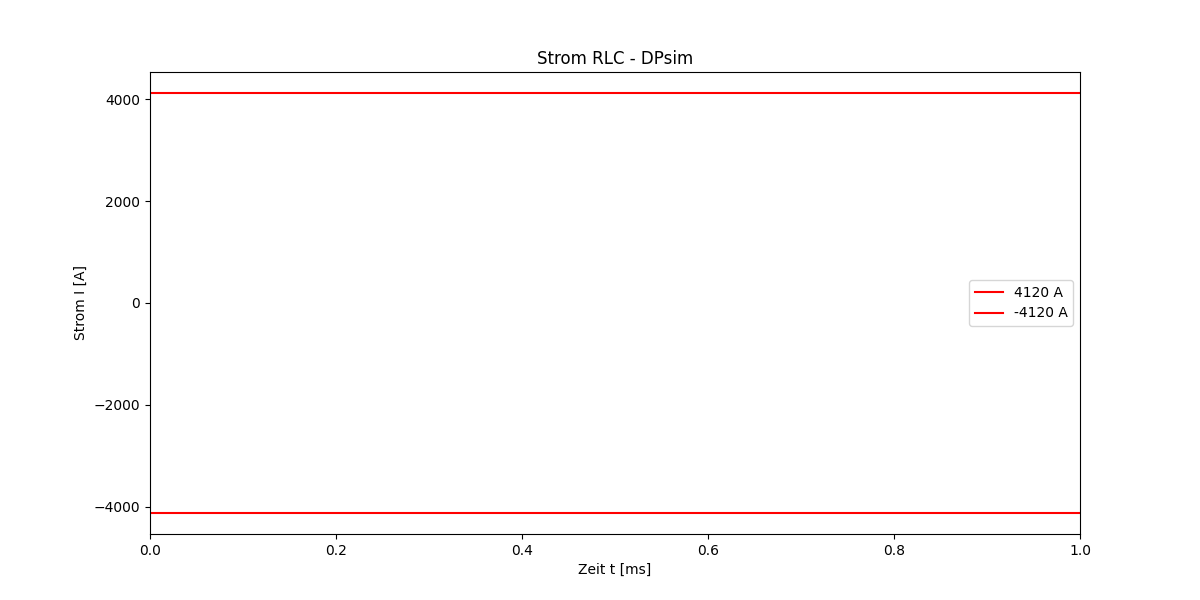

In [8]:
plt.figure(figsize=(12,6))
plt.title('Strom RLC - DPsim')
plt.xlabel('Zeit t [ms]')
plt.ylabel('Strom I [A]')
for ts_name, ts_obj  in ts_dpsim.items():
    if ts_name in ['Strom_RLC_0','Strom_RLC_1','Strom_RLC_2']:
        plt.plot(1000*ts_obj.time, ts_obj.values, label=ts_name)
plt.axhline(y =4120, color = 'r', linestyle = '-',label='4120 A')
plt.axhline(y =-4120, color = 'r', linestyle = '-',label='-4120 A')
plt.legend()
plt.show()

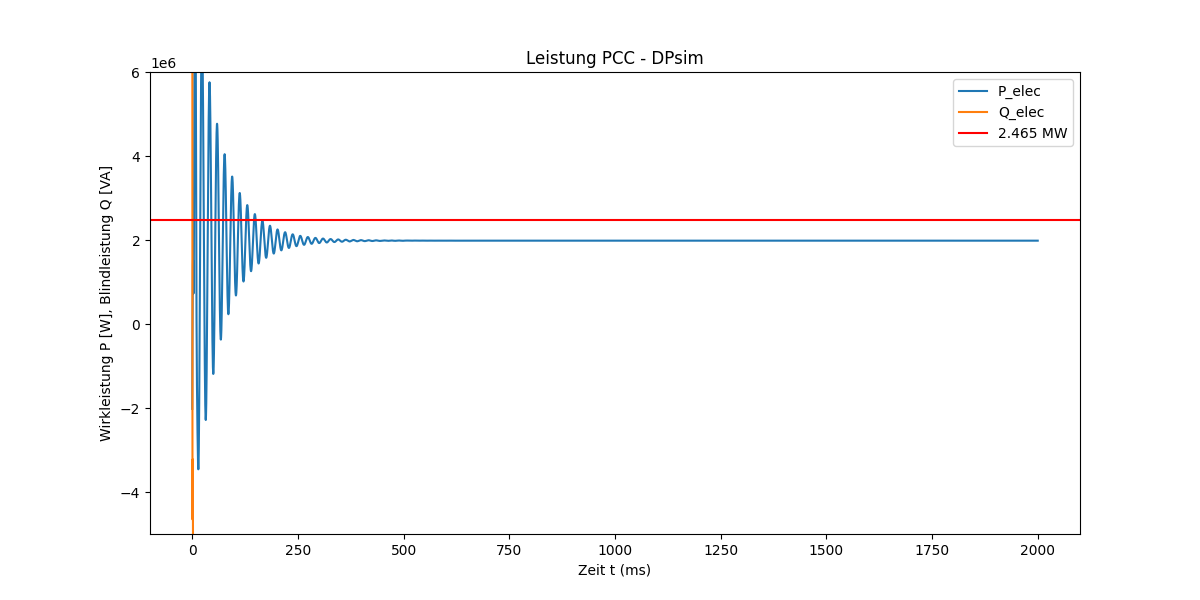

In [9]:
plt.figure(figsize=(12,6))
plt.title('Leistung PCC - DPsim')
plt.xlabel('Zeit t (ms)')
plt.ylabel('Wirkleistung P [W], Blindleistung Q [VA]')
for ts_name, ts_obj  in ts_dpsim.items():
    if ts_name in ['P_elec','Q_elec']:
        plt.plot(1000*ts_obj.time, ts_obj.values, label=ts_name)
plt.axhline(y =2465000, color = 'r', linestyle = '-', label='2.465 MW')
plt.ylim(-5e6, 6e6)
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


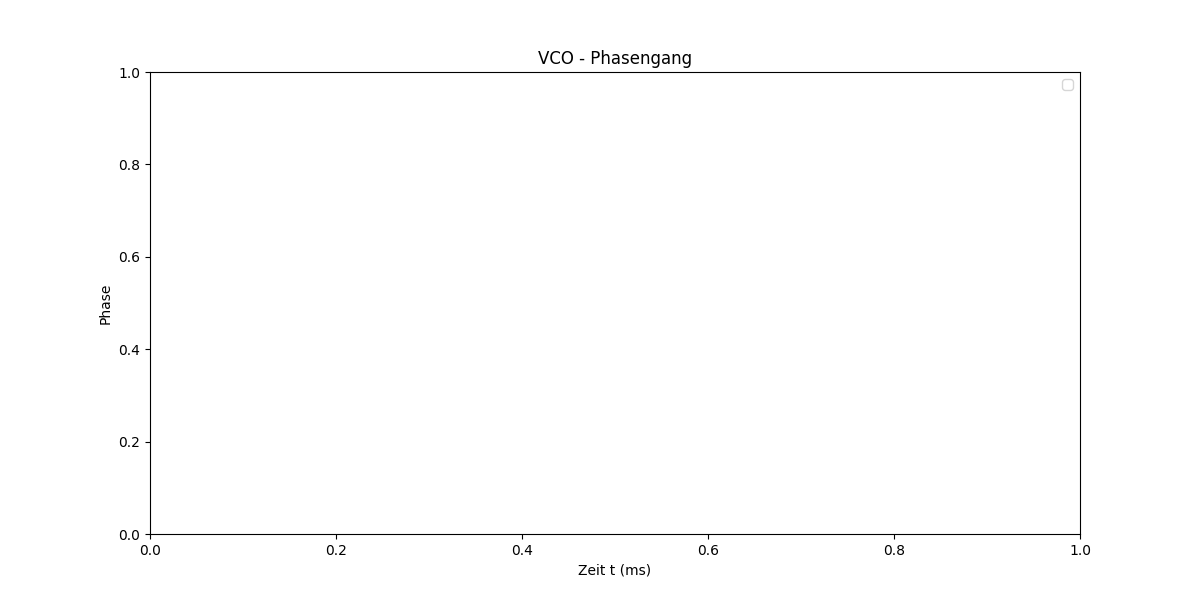

In [10]:
plt.figure(figsize=(12,6))
plt.title('VCO - Phasengang')
plt.xlabel('Zeit t (ms)')
plt.ylabel('Phase')
for ts_name, ts_obj  in ts_dpsim.items():
    if ts_name in ['VCO_Phase']:
        plt.plot(1000*ts_obj.time, ts_obj.values % 6.283, label=ts_name)
plt.legend()
plt.show()